### Import relevant libraries and data

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd  
import seaborn as sns 
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as LR
%matplotlib inline
sns.set()

In [175]:
data = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv', index_col='Column')
data.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [176]:
data.shape

(64461, 61)

In [177]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [178]:
# Columns have been abbreviated or shortened and hence to refer to the actual questions asked in the survey, we will use the 
# schema csv which two columns: "Column" and "QuestionText". Since there is really only one main column, we will retain the 
# column as a pandas series

schema = schema.QuestionText
schema.head()

Column
Respondent                                              Randomized respondent ID number (not in order of survey response time)
MainBranch    Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist                                                                                               Do you code as a hobby?
Age                               What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Age1stCode         At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
Name: QuestionText, dtype: object

In [179]:
# Here is an example of how to retrieve the actual question asked in the survey
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

### Data preprocessing

In [180]:
# There are a lot of 61 columns for us to explore further and understand but we need to limit the the number of columns
# for our exploratory analysis in the interest of time and therefore we will focus on the following themes:

# 1) Demography, socio-economic status i.e., age, gender, race, country, education, sexuality
# 2) Coding knowledge e.g., Hobbyist, Age1stCode, Database experience, Languages
# 3) Preferences - Job hunt, learning a new language, purchase, stackoverflow visits, survey opinion
# 4) Job/employment - Employment, Skill level, developer type, overtime, satisfaction, education importance, compensation,
# organization size, job seeking status

In [181]:
exploratory_columns = [
        
    # Demographics
    
    'Age', 'Country', 'EdLevel', 'Ethnicity', 'Gender', 'Sexuality', 'Trans', 'UndergradMajor',
    
    # Coding knowledge 
    
    'Hobbyist', 'MainBranch', 'Age1stCode', 'LanguageWorkedWith', 
    'DatabaseWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'PlatformWorkedWith',
    'PlatformDesireNextYear', 'YearsCodePro', 'YearsCode', 
    
    # Preferences
    
    'LanguageDesireNextYear', 'DatabaseDesireNextYear', 'SOPartFreq', 'SurveyEase', 'SurveyLength', 'SOComm', 'SOAccount',
    'NEWEdImpt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOtherComms', 'JobFactors', 
    # Job status
    
    'OrgSize', 'NEWOvertime', 'JobSat', 'JobSeek', 'WorkWeekHrs', 'ConvertedComp', 'Employment', 'DevType', 


]

In [182]:
len(exploratory_columns) # From 61 --> 40

39

In [183]:
explore_data = data[exploratory_columns].copy() # We do not want to affect the original dataframe

In [184]:
explore_data.head(1)

,Age,Country,EdLevel,Ethnicity,Gender,Sexuality,Trans,UndergradMajor,Hobbyist,MainBranch,...,NEWOtherComms,JobFactors,OrgSize,NEWOvertime,JobSat,JobSeek,WorkWeekHrs,ConvertedComp,Employment,DevType
0,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Man,Straight / Heterosexual,No,"Computer science, computer engineering, or software engineering",Yes,I am a developer by profession,...,No,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",2 to 9 employees,Often: 1-2 days per week or more,Slightly satisfied,I am not interested in new job opportunities,50.0,NaN,"Independent contractor, freelancer, or self-employed","Developer, desktop or enterprise applications;Developer, full-stack"


In [185]:
scheme_explore = schema[exploratory_columns]

In [186]:
explore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45446 non-null  float64
 1   Country                 64072 non-null  object 
 2   EdLevel                 57431 non-null  object 
 3   Ethnicity               45948 non-null  object 
 4   Gender                  50557 non-null  object 
 5   Sexuality               43992 non-null  object 
 6   Trans                   49345 non-null  object 
 7   UndergradMajor          50995 non-null  object 
 8   Hobbyist                64416 non-null  object 
 9   MainBranch              64162 non-null  object 
 10  Age1stCode              57900 non-null  object 
 11  LanguageWorkedWith      57378 non-null  object 
 12  DatabaseWorkedWith      49537 non-null  object 
 13  MiscTechDesireNextYear  42379 non-null  object 
 14  MiscTechWorkedWith      40314 non-null

Many are object columns due to there being a mixture of data either numerical or string and hence we need to manually adjust each column on a case-by-case basis

In [187]:
# Age is in the correct format, Age1stCode, YearCode, Years Code Pro are not in the correct format so need to change that first

In [188]:
explore_data['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [189]:
explore_data['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [190]:
explore_data['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [191]:
# There are two options, either we remove all the strings and keep numeric or convert to string - We will go with the former
# as using the string approach results in too many categories and therefore not efficient for analysis

explore_data['Age1stCode']    =    pd.to_numeric(explore_data.Age1stCode, errors='coerce')
explore_data['YearsCode']     =    pd.to_numeric(explore_data.YearsCode, errors='coerce')
explore_data['YearsCodePro']  =    pd.to_numeric(explore_data.YearsCodePro, errors='coerce')

In [192]:
explore_data['YearsCodePro'].unique()

array([27.,  4., nan,  8., 13.,  2.,  7., 20.,  1., 23.,  3., 12., 17.,
       18., 10., 14., 29.,  6., 28.,  9., 15., 11., 16., 25.,  5., 21.,
       19., 35., 24., 32., 22., 30., 38., 26., 40., 33., 31., 34., 36.,
       39., 37., 41., 45., 47., 42., 46., 50., 43., 44., 48., 49.])

In [193]:
# let us now see descriptive statistics for both the numerical and categorical columns

explore_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45446.0,30.834111,9.585392,1.0,24.0,29.0,35.0,279.0
Age1stCode,57473.0,15.476572,5.114081,5.0,12.0,15.0,18.0,85.0
YearsCodePro,44133.0,8.869667,7.759961,1.0,3.0,6.0,12.0,50.0
YearsCode,56784.0,12.782051,9.490657,1.0,6.0,10.0,17.0,50.0
WorkWeekHrs,41151.0,40.782174,17.816383,1.0,40.0,40.0,44.0,475.0
ConvertedComp,34756.0,103756.050150,226885.296243,0.0,24648.0,54049.0,95000.0,2000000.0


In [194]:
# Looks as if age column has some outliers such as 1 years old or 279, same can be seen by work week hours as the answer
# cannot be above 168 therefore the survery has invalid responses, common occurence
# For workweekhours, a good limit would be 18 hours a day or lower for 7 days as above that would indicate one does not sleep
# and is a robot technically
# 18 x 7 = 126 hours a week - lets approximate to 130 hours

In [195]:
# A simple solution is to drop all values concerning age above 90 years (no one will be at stackoverflow at that age in 2022) 
# and below 10 years since we are predicting professional coding experience

explore_data.drop(explore_data[explore_data.Age < 10].index, inplace=True)
explore_data.drop(explore_data[explore_data.Age > 90].index, inplace=True)

In [196]:
explore_data.drop(explore_data[explore_data.WorkWeekHrs > 130].index, inplace=True)

In [197]:
# Let us look at statistics of categorical or object type columns to understand the data and survey respondents better

In [198]:
pd.set_option('display.max_colwidth', None)

In [199]:
explore_data.describe(include='object').T

,count,unique,top,freq
Country,63894,183,United States,12466
EdLevel,57260,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26472
Ethnicity,45814,208,White or of European descent,29231
Gender,50408,7,Man,45884
Sexuality,43866,14,Straight / Heterosexual,40003
Trans,49203,2,No,48732
UndergradMajor,50852,12,"Computer science, computer engineering, or software engineering",31488
Hobbyist,64238,2,Yes,50251
MainBranch,63985,5,I am a developer by profession,47042
LanguageWorkedWith,57216,14229,HTML/CSS;JavaScript;PHP;SQL,1069


In [200]:
# The majority of people in our data are:

# From the US, have a bachelor's degree, have full-time employment
# male, straight, have a computer science undergraduate degree, code as hobby, 
# developer as profession, want to work with Linux and PostgreSQL, keen to learn python, stated the survey was easy,
# highlight previous formal education as fairly important to one's career, read company media like LinkedIn or ask their 
# network for looking at new companies, learn a new language or framework every couple of months, like remote and flexible work,
# rarely do overtime work, not actively searching for jobs but are flexible in changing jobs

In [201]:
# Question: What do respondents rank as the most important aspect of a job when assessing a potential job opportunity? 

# A) Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options

In [202]:
# Let us explore gender further
# We see that apart from Male and Female, the other categories are too low in numbers and can be technically just put in the 
# other category of Non-binary or other - we will go with other
explore_data['Gender'].value_counts()

Man                                                            45884
Woman                                                           3833
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

In [203]:
replacement_dict =   {'Non-binary, genderqueer, or gender non-conforming': 'Other',
                      'Man;Non-binary, genderqueer, or gender non-conforming': 'Other',
                      'Woman;Non-binary, genderqueer, or gender non-conforming': 'Other',
                      'Woman;Man': 'Other',
                      'Woman;Man;Non-binary, genderqueer, or gender non-conforming': 'Other'}

explore_data['Gender'] = explore_data['Gender'].replace(replacement_dict)

In [204]:
explore_data['Gender'].value_counts()

Man      45884
Woman     3833
Other      691
Name: Gender, dtype: int64

In [205]:
len(explore_data['Ethnicity'].unique()) # As number of ethnicities are so many, it may not be the best approach to 
# manually adjust and map into common groups

209

### Section 1 - Exploratory Data Analysis

In [206]:
# We have done sufficient cleaning for us to plot and explore our data better and ask any interesting questions about the data

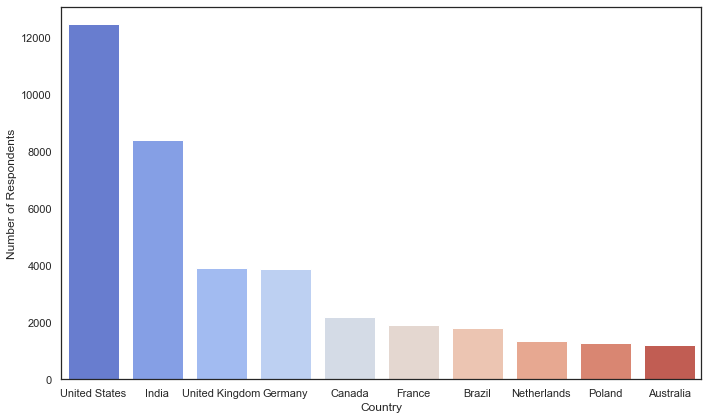

In [207]:
# There may be some sampling bias in the data for example the survery being done in English only so is not representative of 
# the whole stackoverflow community

# Let us see the top 10 most common countries of the respondents 
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.barplot(x=explore_data['Country'].value_counts().head(10).index, y=explore_data['Country'].value_counts().head(10), palette
           ='coolwarm')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.tight_layout()

In [208]:
# Most of these countries --> The number of respondents in the US, India, UK and Germany is far greater than all other countries
# This indicates that the sample is mainly representative of English Speaking countries and not a global respresentation of 
# programmers on stackoverflow

# The distribution of home countries seem to be rightly (positively skewed)

In [209]:
explore_data['Ethnicity'].value_counts().head(10)

White or of European descent                           29231
South Asian                                             4461
Hispanic or Latino/a/x                                  2251
Southeast Asian                                         1685
Black or of African descent                             1683
East Asian                                              1679
Middle Eastern                                          1613
Hispanic or Latino/a/x;White or of European descent      762
Middle Eastern;White or of European descent              377
Multiracial                                              287
Name: Ethnicity, dtype: int64

In [210]:
# The main ethnicity is white of European or other descent and the next is South Asian i.e., India, following by Latino 
# and South East Asia (Singapore, Malaysia, Indonesia etc)
# These make sense as the top country for number of respondents is the US and the second is India
# The latino population and Southeast Asia population mainly come from the US and UK I think

In [211]:
numeric_columns = explore_data.select_dtypes(include=np.number).columns.tolist()

In [212]:
numeric_columns.append('Gender') # We will add Gender to use as the hue for our pairplot

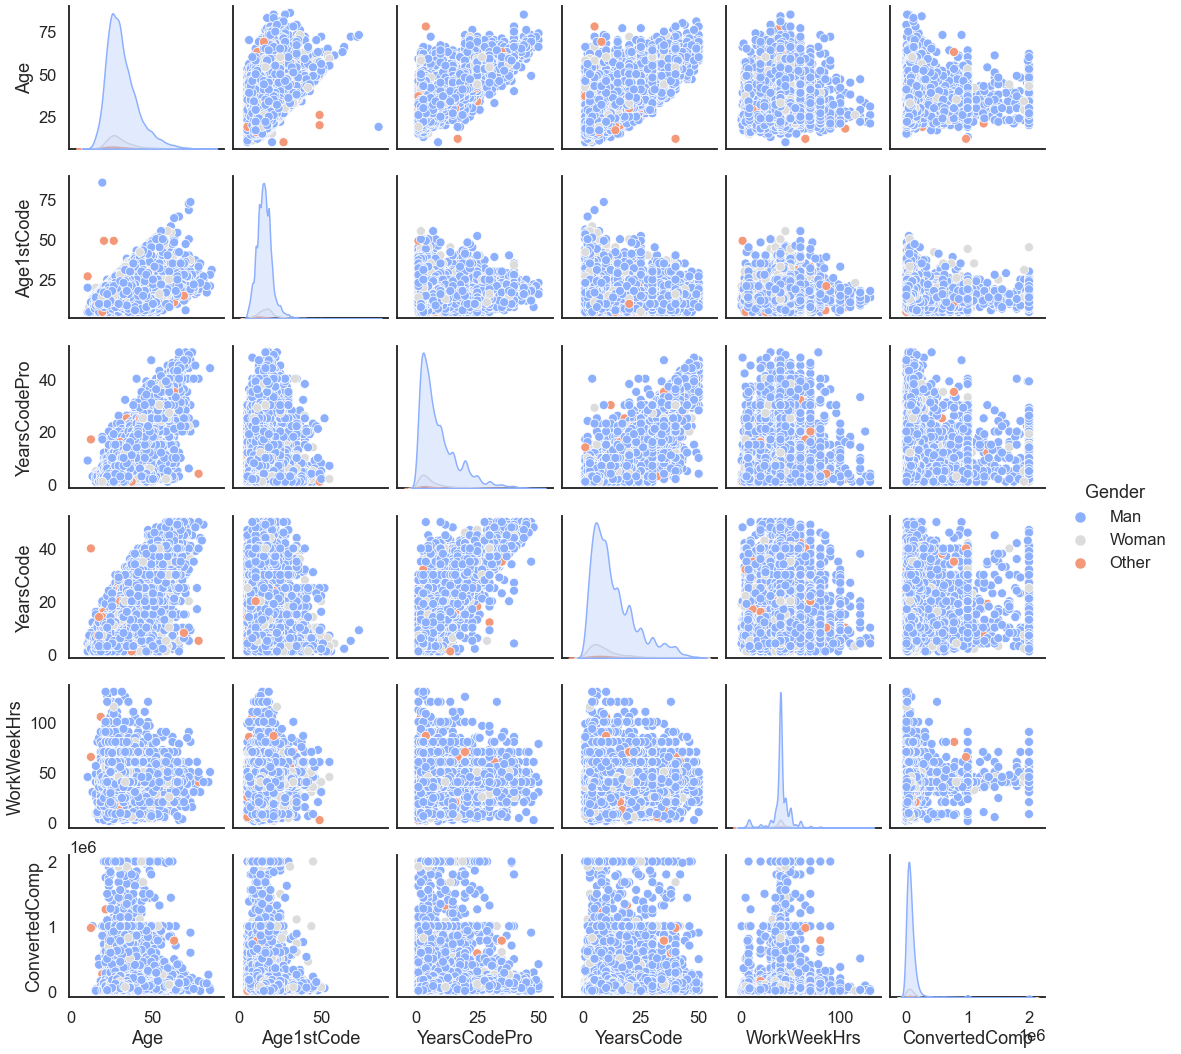

In [213]:
# Focusing on Age
# Let us first see any relationships between the numerical columns
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(explore_data[numeric_columns], palette='coolwarm', hue='Gender') # Does take a while to run unfortunately

In [214]:
# The points are mainly male, surprisingly there is no relationship between work week hours and age as one would maybe expect
# that work hours either increase of decrease as one gets older. 

In [215]:
numeric_columns.remove('Gender')

Text(0.5, 1.0, 'Correlation Heatmap')

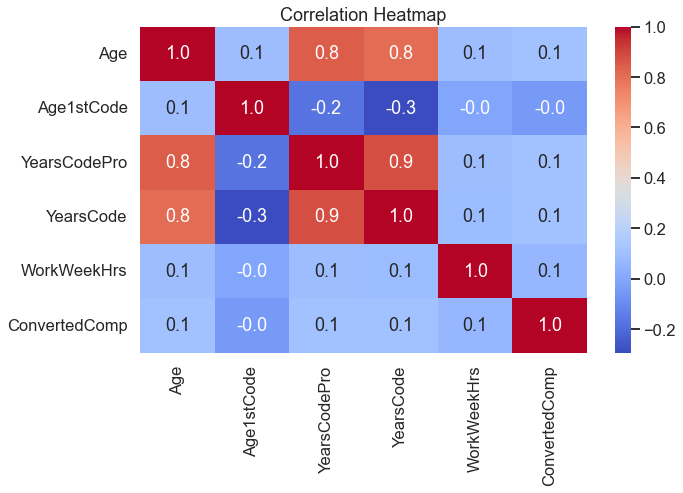

In [216]:
corr = explore_data[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap')

In [217]:
# As we can expect, age and years of experiencing coding are highly correlated, also the more coding experience one has 
# in education, the more coding experience in one's career/professional life

<AxesSubplot:xlabel='Age', ylabel='Gender'>

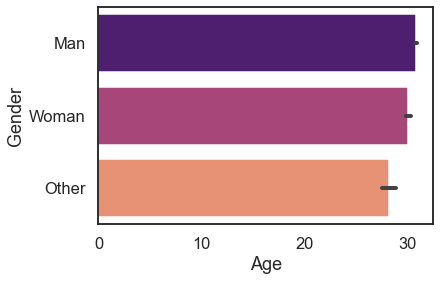

In [218]:
sns.barplot(x='Age', y='Gender', data=explore_data, palette='magma') # average age around 30 for all genders

In [219]:
explore_data['Age'].dropna().values

array([25., 31., 36., ..., 38., 64., 17.])

NormaltestResult(statistic=9043.436425307253, pvalue=0.0)


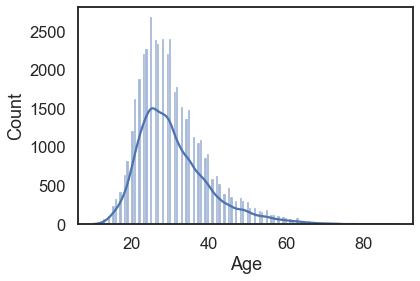

In [220]:
sns.histplot(x='Age', data=explore_data, kde=True) # Does almost seem like a normal distribution 
# Let us perform the D'Agostino K^2 Test
from scipy.stats.mstats import normaltest
print(normaltest(explore_data['Age'].dropna().values)) # The p-value is extremely low and hence, the distribution is not normal

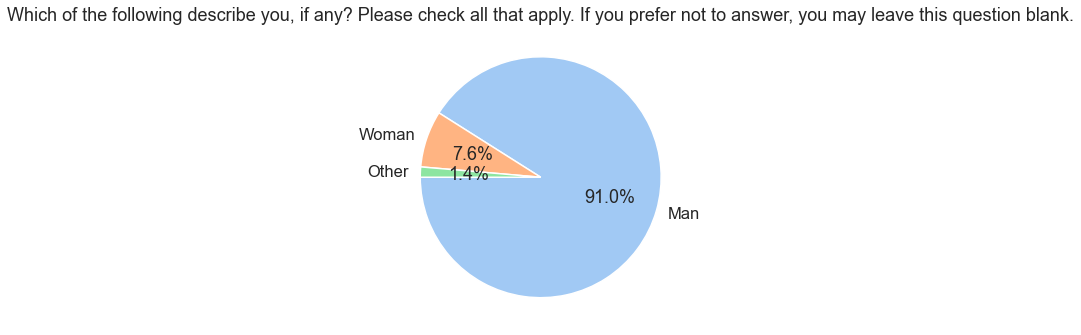

In [221]:
# Looking the number of respondents based on Gender
plt.figure(figsize=(7,5))
plt.title(schema.Gender)
colors = sns.color_palette('pastel')[0:5]
plt.pie(explore_data.Gender.value_counts(), labels=explore_data.Gender.value_counts().index, autopct='%1.1f%%', startangle=180,
       normalize=True, colors = colors);
plt.tight_layout()

In [222]:
# Let us turn our attention to education, sexuality, coding as a hobby

explore_data[['EdLevel', 'Ethnicity', 'Sexuality', 'Trans', 'UndergradMajor', 'Hobbyist']].head(2)

,EdLevel,Ethnicity,Sexuality,Trans,UndergradMajor,Hobbyist
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,Straight / Heterosexual,No,"Computer science, computer engineering, or software engineering",Yes
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",No


In [223]:
explore_data['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [224]:
replacement_dict_2 =   {'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Masters',
                      'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelors',
                      'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary',
                      'Professional degree (JD, MD, etc.)': 'Professional degree',
                      'Some college/university study without earning a degree': 'Drop out',
                      'Associate degree (A.A., A.S., etc.)':'Associate degree',
                      'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral',
                      'Primary/elementary school': 'Elementary',
                      'I never completed any formal education': 'No formal education'
                       }

explore_data['EdLevel'] = explore_data['EdLevel'].replace(replacement_dict_2)

Text(0, 0.5, 'Number of Respondents')

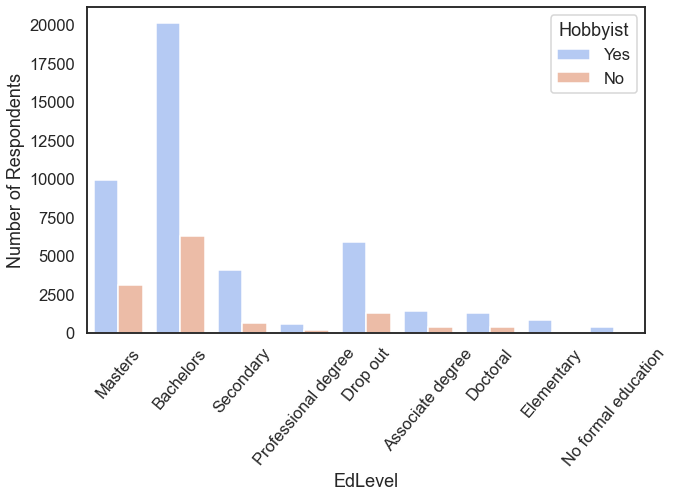

In [225]:
plt.figure(figsize=(10,6))
sns.countplot(x='EdLevel', data=explore_data, hue='Hobbyist', palette='coolwarm')
plt.xticks(rotation=50)
plt.ylabel('Number of Respondents')

In [226]:
# A lot of bachelors and masters degree holders with most of them coding as a hobby. Also a lot of Dropouts in the 
# stackoverflow community. Surprisingly, even people with elementary or no formal education code as a hobby which probably
# indicates people from all educational backgrounds code which is motivating for someone to learn programming

In [227]:
pct_major = (explore_data['UndergradMajor'].value_counts() / explore_data['UndergradMajor'].value_counts().sum()) * 100

<AxesSubplot:xlabel='UndergradMajor'>

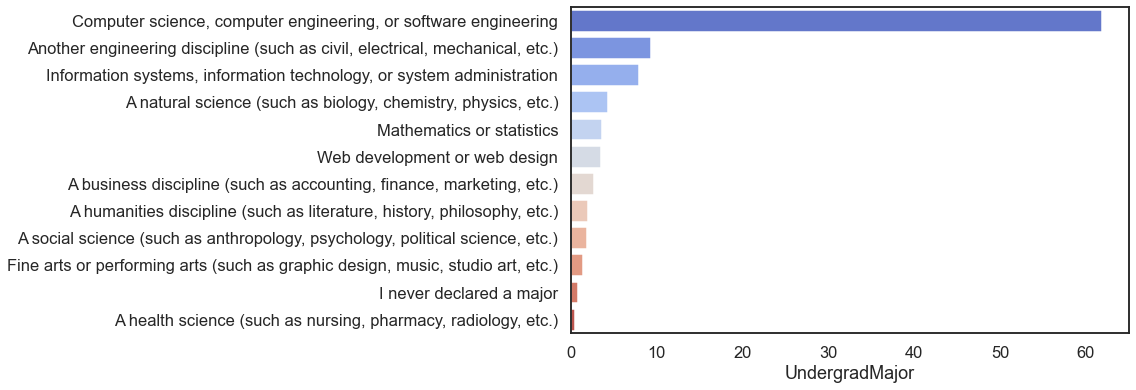

In [228]:
plt.figure(figsize=(10,6))
# Express undergraduate major as percentage of number of all majors 
sns.barplot(x=pct_major, y=pct_major.index, palette='coolwarm')

In [229]:
explore_data['Sexuality'].unique()

array(['Straight / Heterosexual', nan, 'Gay or Lesbian', 'Queer',
       'Bisexual;Straight / Heterosexual', 'Bisexual', 'Bisexual;Queer',
       'Gay or Lesbian;Queer',
       'Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer',
       'Bisexual;Straight / Heterosexual;Queer',
       'Bisexual;Gay or Lesbian', 'Straight / Heterosexual;Queer',
       'Bisexual;Gay or Lesbian;Straight / Heterosexual',
       'Gay or Lesbian;Straight / Heterosexual',
       'Bisexual;Gay or Lesbian;Queer'], dtype=object)

In [230]:
replacement_dict_3 =   {'Straight / Heterosexual': 'Heterosexual',
                        'Gay or Lesbian': 'Homosexual',
                        'Bisexual;Straight / Heterosexual': 'Bisexual',
                        'Bisexual;Queer': 'Mixed',
                        'Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer':'Mixed',
                        'Bisexual;Gay or Lesbian;Straight / Heterosexual': 'Mixed',
                        'Gay or Lesbian;Straight / Heterosexual': 'Mixed',
                        'Bisexual;Gay or Lesbian;Queer': 'Mixed',
                        'Gay or Lesbian;Queer': 'Mixed',
                        'Bisexual;Straight / Heterosexual;Queer': 'Mixed',
                        'Bisexual;Gay or Lesbian': 'Mixed',
                        'Straight / Heterosexual;Queer': 'Mixed'
                       }

explore_data['Sexuality'] = explore_data['Sexuality'].replace(replacement_dict_3)

In [231]:
explore_data['Sexuality'].unique()

array(['Heterosexual', nan, 'Homosexual', 'Queer', 'Bisexual', 'Mixed'],
      dtype=object)

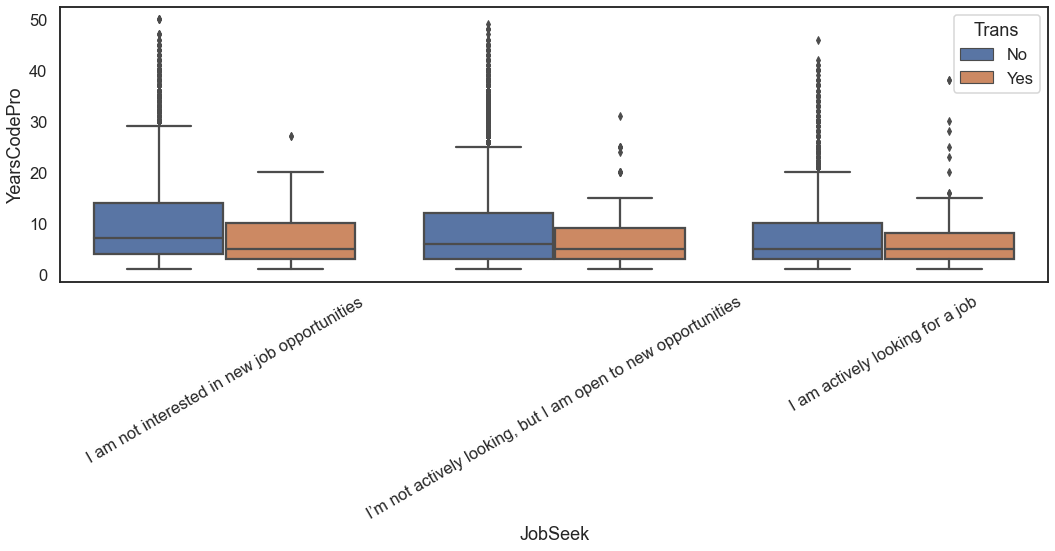

In [232]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='JobSeek', y='YearsCodePro', data=explore_data, hue='Trans')
plt.xticks(rotation=30)
plt.tight_layout()

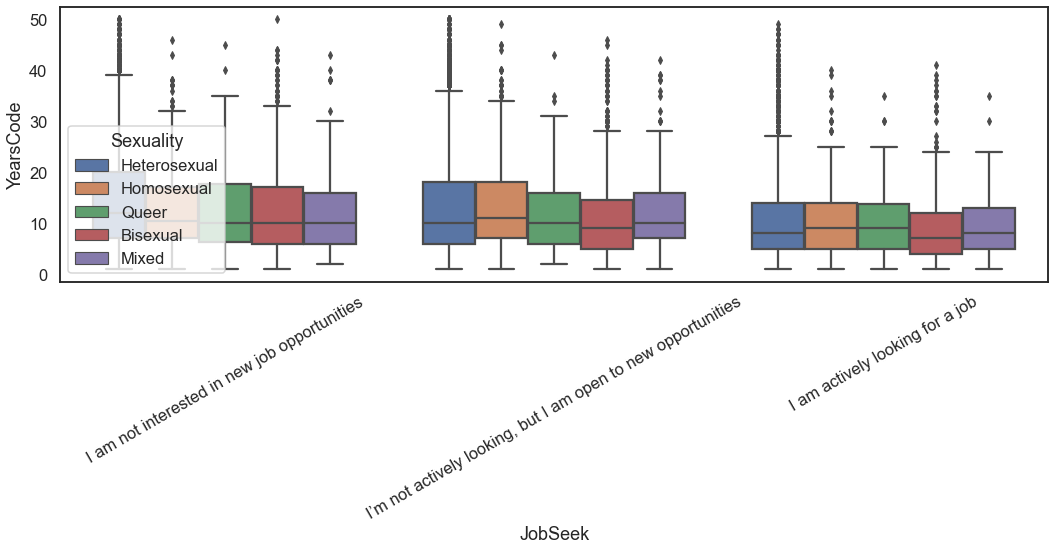

In [233]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='JobSeek', y='YearsCode', data=explore_data, hue='Sexuality')
plt.xticks(rotation=30)
plt.tight_layout()

In [234]:
# A lot of heterosexuals are not interested in new jobs whereas all the sexualities are neraly balanced when it comes to 
# looking for a new job

# Trans perhaps do not have many years of coding as non trans but not a vast difference but the amount of people who are Trans
# in the survey are very small 

In [235]:
explore_data.Trans.value_counts()

No     48732
Yes      471
Name: Trans, dtype: int64

In [236]:
explore_data[explore_data.Trans == 'Yes']['JobSat'].value_counts() # Many Trans are satisfied with their job

Very satisfied                        110
Slightly satisfied                     76
Slightly dissatisfied                  48
Very dissatisfied                      43
Neither satisfied nor dissatisfied     37
Name: JobSat, dtype: int64

<AxesSubplot:xlabel='Sexuality', ylabel='count'>

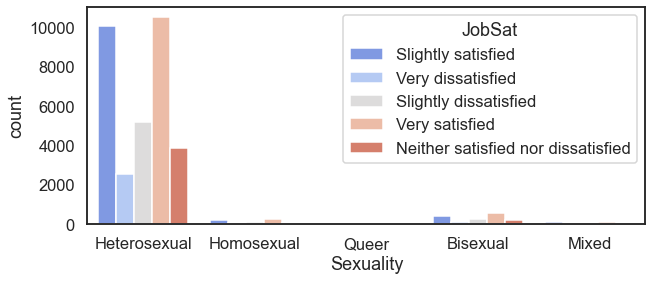

In [237]:
plt.figure(figsize=(10,4))
sns.countplot(x='Sexuality', data=explore_data, hue='JobSat', palette='coolwarm')

In [238]:
# Sexuality and job satisfaction do not correlate much - ALsp there arent many non heterosexuals so cannot say for sure

In [239]:
# Finally, let us move onto coding knowledge, employment etc of the respondents
explore_data[['MainBranch']].value_counts() # Many are coding professionals however, students learning how to code are 
# great numbers which indicate stackoverflow is a place to be when learning how to code

MainBranch                                                                   
I am a developer by profession                                                   47042
I am a student who is learning to code                                            7963
I am not primarily a developer, but I write code sometimes as part of my work     5488
I code primarily as a hobby                                                       2310
I used to be a developer by profession, but no longer am                          1182
dtype: int64

<AxesSubplot:xlabel='MainBranch'>

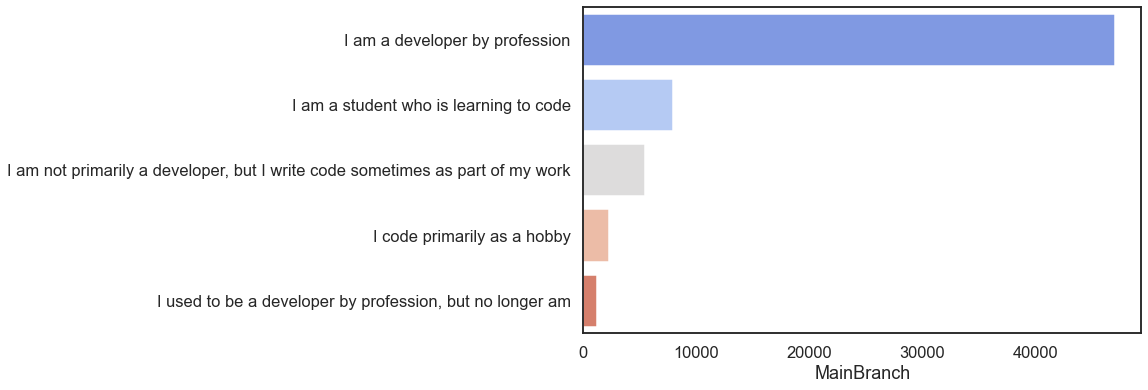

In [240]:
plt.figure(figsize=(10,6))
# Express Main branch as percentage of number of all majors 
sns.barplot(x=explore_data['MainBranch'].value_counts(), y=explore_data['MainBranch'].value_counts().index, palette='coolwarm')

In [241]:
# Many respondents are developers and some are students
explore_data['DatabaseWorkedWith'].value_counts()

MySQL                                                                                               3820
Microsoft SQL Server                                                                                3286
PostgreSQL                                                                                          1932
SQLite                                                                                              1309
Microsoft SQL Server;MySQL                                                                          1155
                                                                                                    ... 
Couchbase;Elasticsearch;MySQL;Oracle;PostgreSQL                                                        1
Couchbase;Elasticsearch;MariaDB;MongoDB;MySQL;PostgreSQL                                               1
Firebase;IBM DB2;MariaDB;Microsoft SQL Server;MySQL;PostgreSQL                                         1
Cassandra;Couchbase;DynamoDB;MariaDB;Microsoft SQL Serv

In [242]:
explore_data['PlatformWorkedWith'].value_counts()

Windows                                                                       4750
Linux;Windows                                                                 2453
Linux                                                                         2106
Android                                                                       1200
Microsoft Azure;Windows                                                        994
                                                                              ... 
Android;AWS;Heroku;iOS;Linux                                                     1
Android;Docker;Heroku;Linux;Raspberry Pi;Slack Apps and Integrations             1
Android;Arduino;AWS;Docker;iOS;Kubernetes;Linux;MacOS;Raspberry Pi               1
Android;AWS;Docker;Linux;MacOS;Raspberry Pi;Slack Apps and Integrations          1
AWS;Google Cloud Platform;Heroku;iOS;Linux;MacOS;Microsoft Azure;WordPress       1
Name: PlatformWorkedWith, Length: 6274, dtype: int64

In [243]:
explore_data['LanguageDesireNextYear'].value_counts().head(5)

Python                            1149
Rust                               527
HTML/CSS;JavaScript;TypeScript     498
C#                                 458
Go                                 410
Name: LanguageDesireNextYear, dtype: int64

In [244]:
# We need a function which splits all the values in the above columns by ; so we easily visualize the results
# Every unique value is a column in a dataframe

In [245]:
def split_function(df,column):
    new_vals = []
    for i in df[column].dropna():
        i = i.split(';')
        if type(i) == list:
            for x in i:
                new_vals.append(x)
        else:
            new_vals.append(i)
    return new_vals
                

In [246]:
# Platform worked with and desire to work with in the next year

In [247]:
x = len(pd.DataFrame(split_function(explore_data, 'PlatformWorkedWith')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'PlatformWorkedWith')).value_counts().index[i][0])

Text(0.5, 1.0, 'Which platforms have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the platform and want to continue to do so, please check both boxes in that row.)')

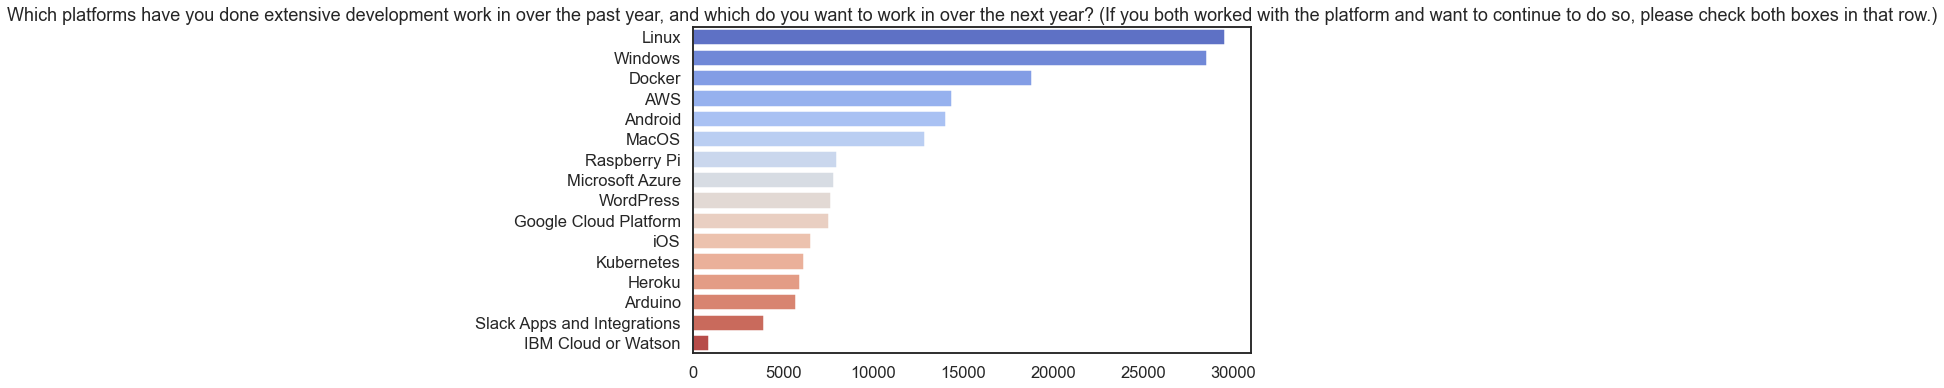

In [248]:
platform = pd.DataFrame(split_function(explore_data, 'PlatformWorkedWith')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.PlatformWorkedWith)

Text(0.5, 1.0, 'Which platforms have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the platform and want to continue to do so, please check both boxes in that row.)')

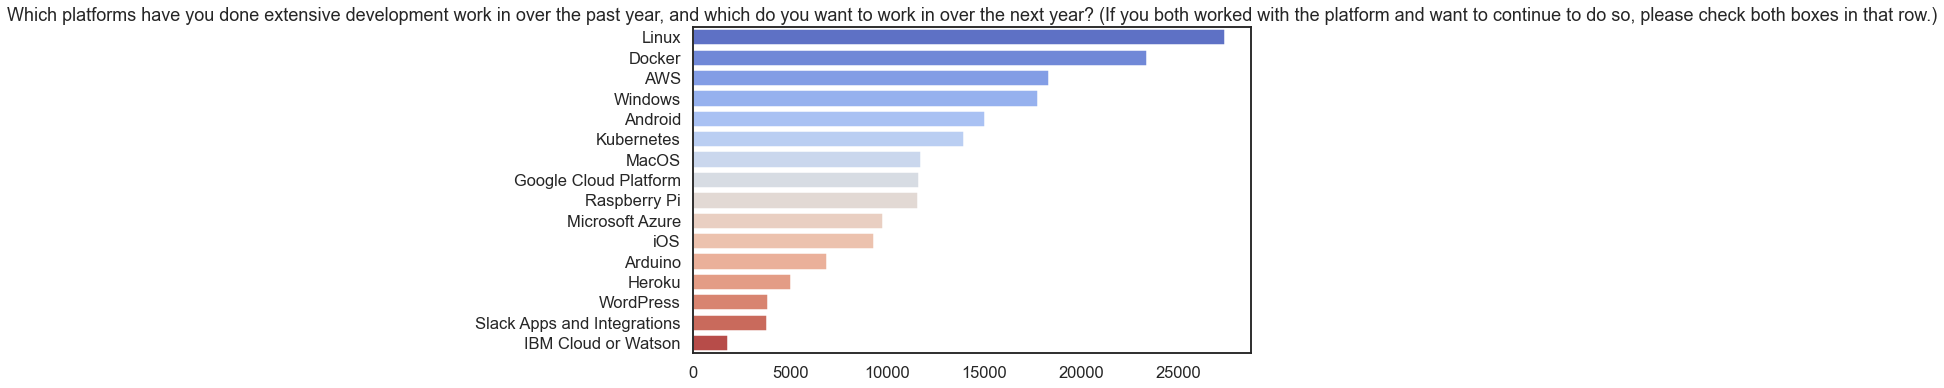

In [249]:
x = len(pd.DataFrame(split_function(explore_data, 'PlatformDesireNextYear')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'PlatformDesireNextYear')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'PlatformDesireNextYear')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.PlatformDesireNextYear)

Text(0.5, 1.0, 'Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)')

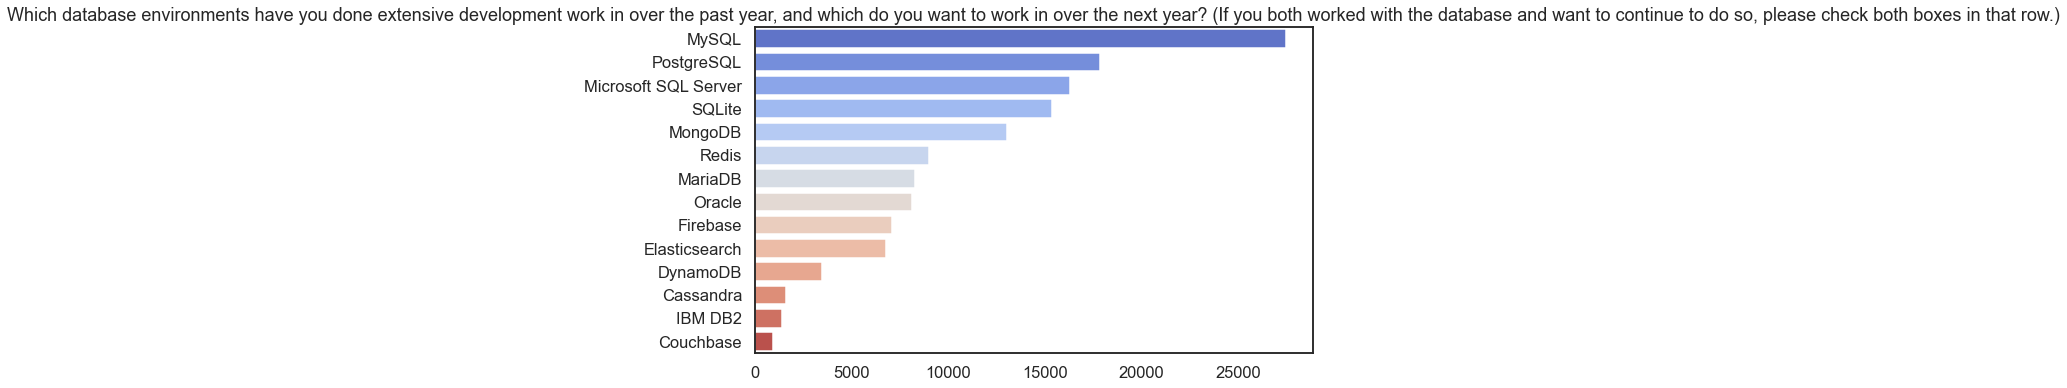

In [250]:
# Miscellaneous tech, languages, databases, languages

x = len(pd.DataFrame(split_function(explore_data, 'DatabaseWorkedWith')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'DatabaseWorkedWith')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'DatabaseWorkedWith')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.DatabaseWorkedWith)

Text(0.5, 1.0, 'Languages used in the past')

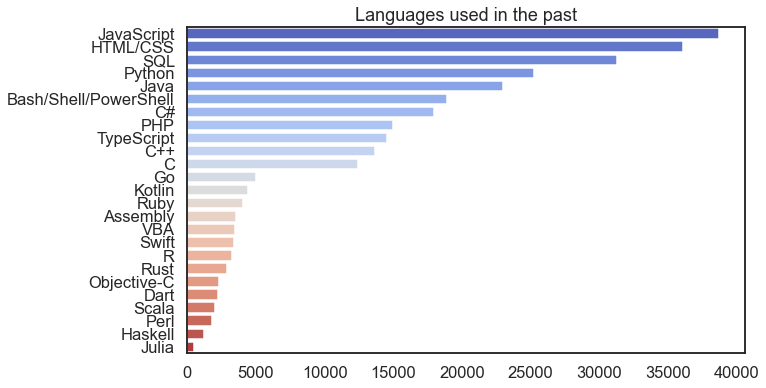

In [251]:
# Miscellaneous tech, languages, databases, languages

x = len(pd.DataFrame(split_function(explore_data, 'LanguageWorkedWith')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'LanguageWorkedWith')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'LanguageWorkedWith')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
sns.barplot(x=platform, y=y, palette='coolwarm')
plt.title('Languages used in the past')

Text(0.5, 1.0, 'Languages desired to work on further')

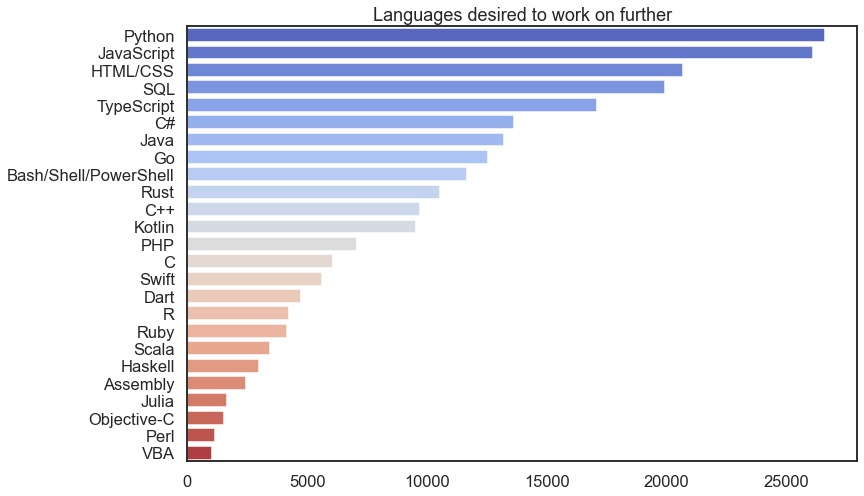

In [252]:
# Miscellaneous tech, languages, databases, languages

x = len(pd.DataFrame(split_function(explore_data, 'LanguageDesireNextYear')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'LanguageDesireNextYear')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'LanguageDesireNextYear')).value_counts()
plt.figure(figsize=(12,8))
# Express Platform experience as percentage of number of all majors 
sns.barplot(x=platform, y=y, palette='coolwarm')
plt.title('Languages desired to work on further')

In [253]:
# A lot more Python and JavaScript is desired by the community, TypeScript has also jumped in popularity

Text(0.5, 1.0, 'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)')

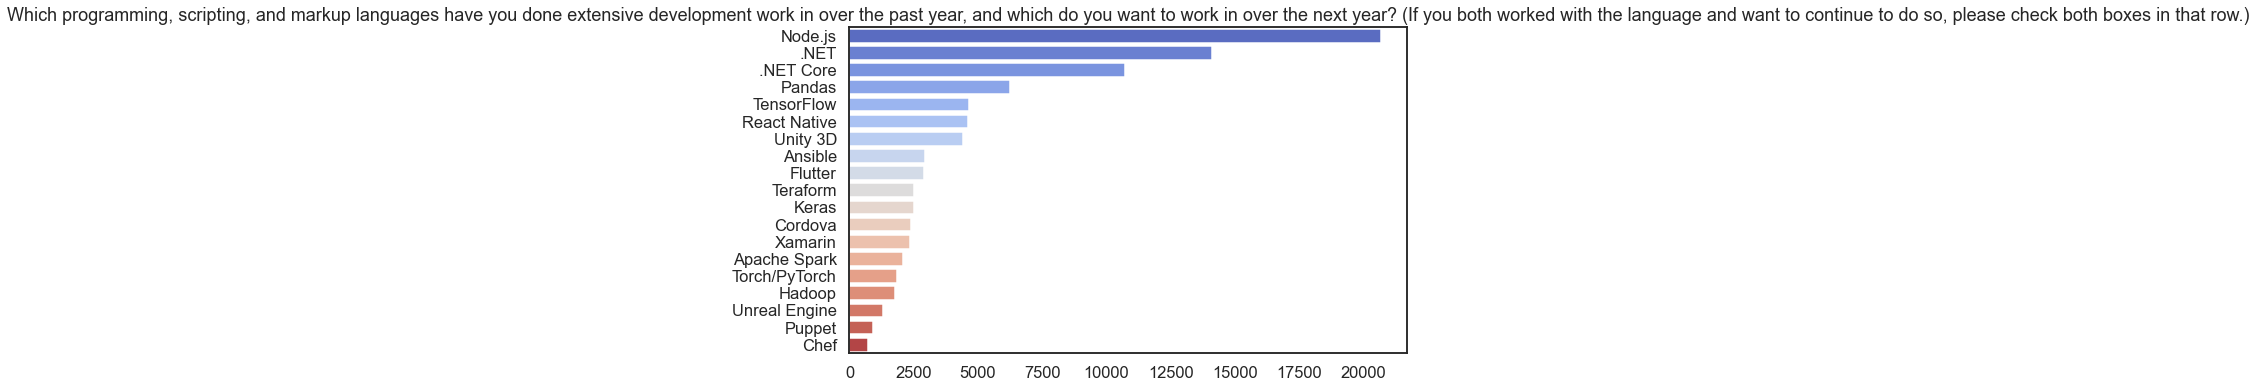

In [254]:
# Miscellaneous tech, languages, databases, languages

x = len(pd.DataFrame(split_function(explore_data, 'MiscTechWorkedWith')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'MiscTechWorkedWith')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'MiscTechWorkedWith')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.LanguageDesireNextYear)

Text(0.5, 1.0, 'When job searching, how do you learn more about a company? Select all that apply.')

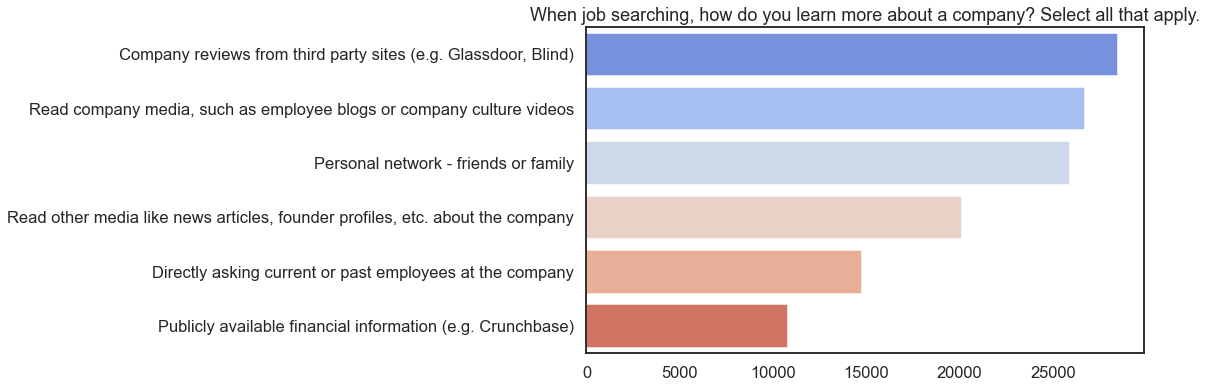

In [255]:
# Miscellaneous tech, languages, databases, languages, Job hunmt research

x = len(pd.DataFrame(split_function(explore_data, 'NEWJobHuntResearch')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'NEWJobHuntResearch')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'NEWJobHuntResearch')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.NEWJobHuntResearch)

Text(0.5, 1.0, 'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.')

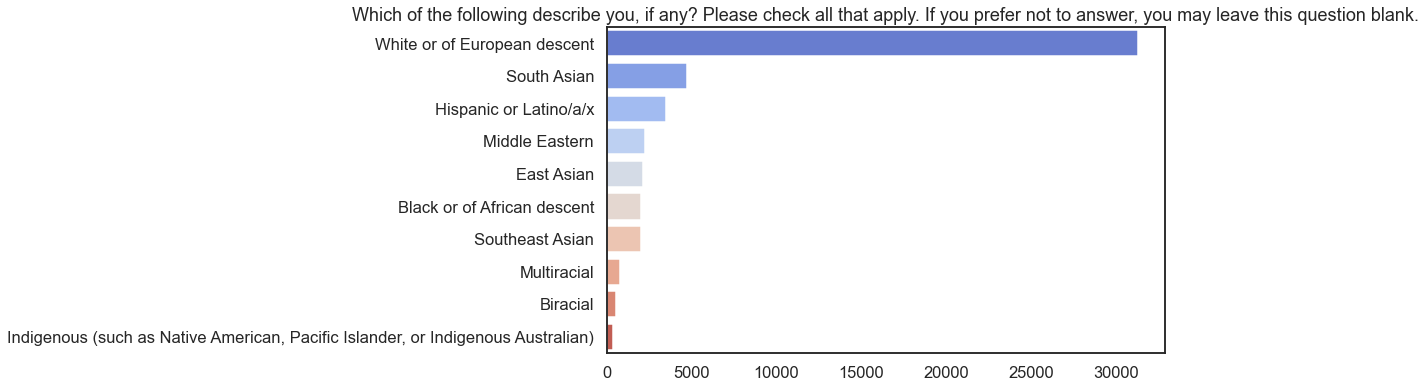

In [256]:
# Ethnicities - white/South Asian

x = len(pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.Ethnicity)

Text(0.5, 1.0, 'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.')

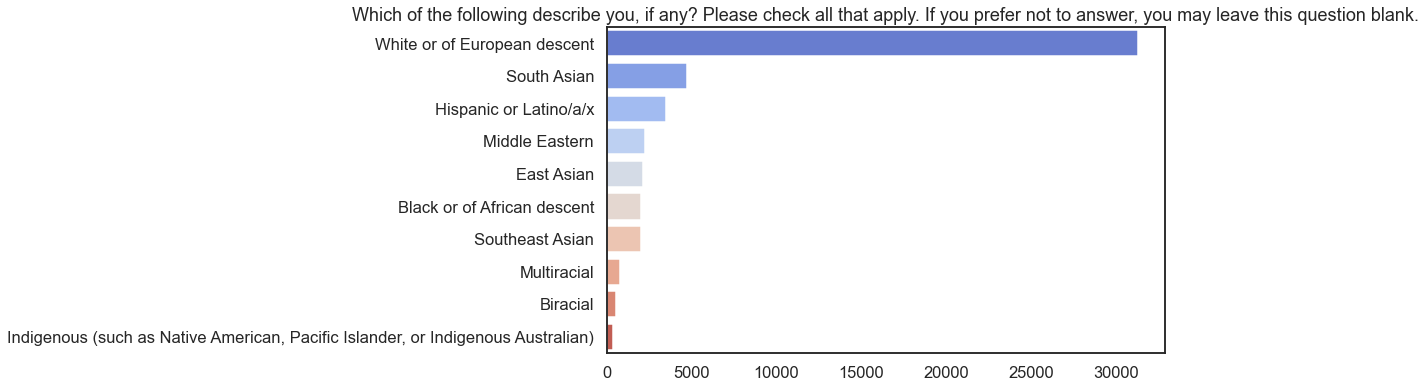

In [257]:
# Miscellaneous tech, languages, databases, languages

x = len(pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()) 
y = []
for i in range(x):
    y.append(pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts().index[i][0])
    
platform = pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()
plt.figure(figsize=(10,6))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.Ethnicity)

Text(0.5, 1.0, 'Approximately how many people are employed by the company or organization you currently work for?')

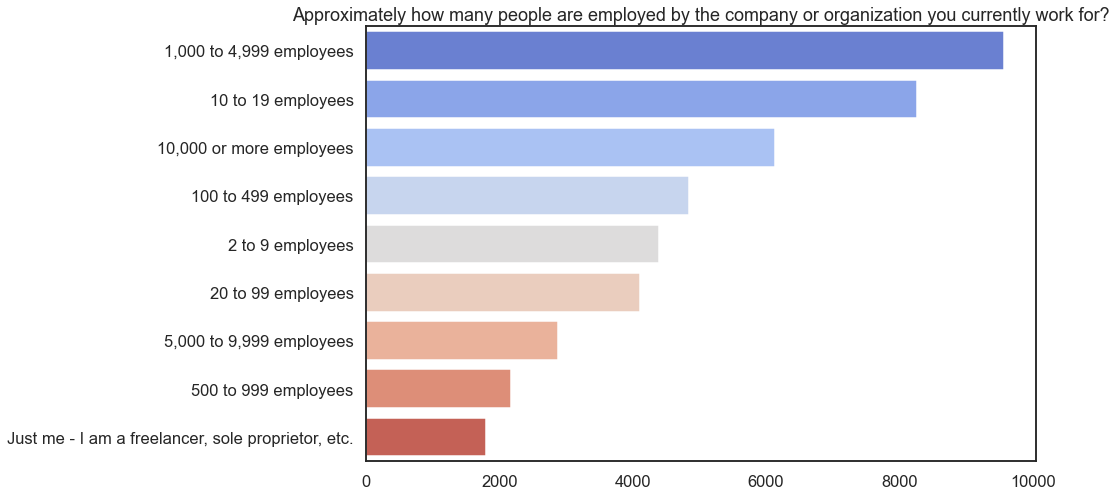

In [258]:
# Miscellaneous tech, languages, databases, languages, StackOverFlow

# People work in either medium sized or startups, few are freelancers
y = list(np.unique(pd.DataFrame(split_function(explore_data, 'OrgSize'))))

platform = pd.DataFrame(split_function(explore_data, 'OrgSize')).value_counts()
plt.figure(figsize=(12,8))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.OrgSize)

Text(0.5, 1.0, 'Which of the following best describes your current employment status?')

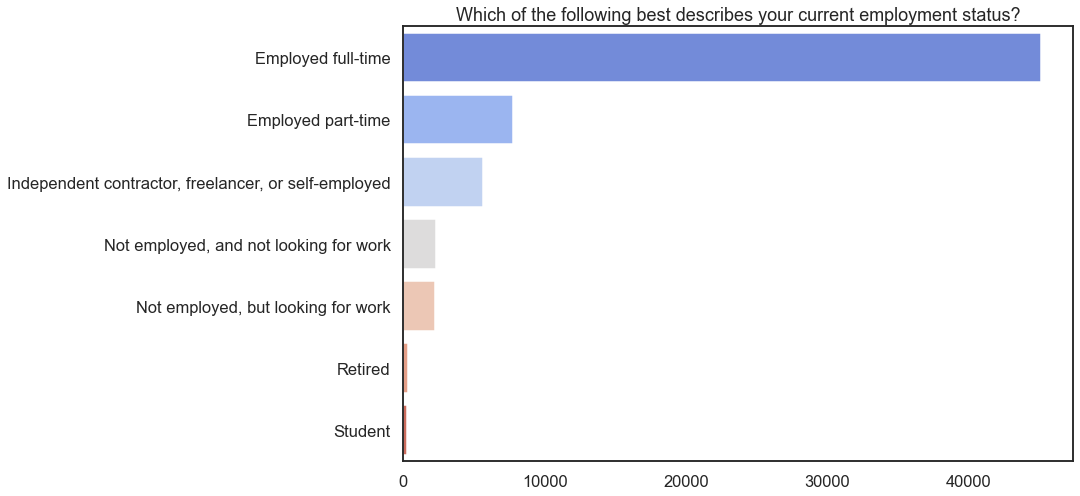

In [259]:
# Miscellaneous tech, languages, databases, languages, StackOverFlow

y = list(np.unique(pd.DataFrame(split_function(explore_data, 'Employment'))))

platform = pd.DataFrame(split_function(explore_data, 'Employment')).value_counts()
plt.figure(figsize=(12,8))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.Employment)

Text(0.5, 1.0, 'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)')

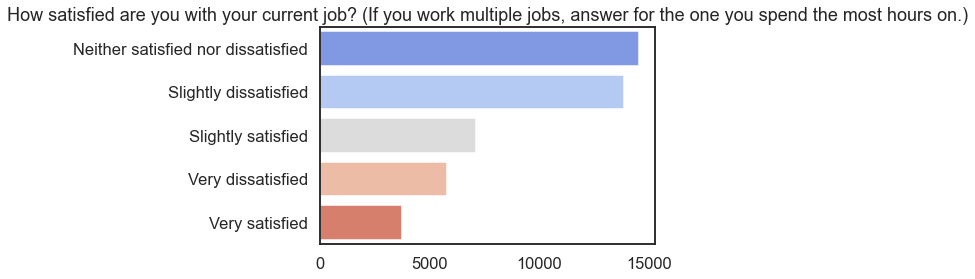

In [260]:
# Miscellaneous tech, languages, databases, languages, StackOverFlow

y = list(np.unique(pd.DataFrame(split_function(explore_data, 'JobSat'))))

platform = pd.DataFrame(split_function(explore_data, 'JobSat')).value_counts()
plt.figure(figsize=(6,4))
# Express Platform experience as percentage of number of all majors 
ax = sns.barplot(x=platform, y=y, palette='coolwarm')
ax.set_title(schema.JobSat)

In [261]:
# A lot of people seem unhappy with their jobs could be due to compensation or salary or work hours etc

In [262]:
# Most people either work in SMEs - Small to Medium Enterprises 

In [263]:
# Do Job factors or does job satisfaction depend on ethnicity or country, does the coding language 
# experience depend on country or gender perhaps, relationship between coding experience and age, average age when people 
# started coding - here are some questions we can explore further to complete our exploratory data analysis

In [264]:
explore_data[['JobSat', 'Ethnicity']].dropna()

,JobSat,Ethnicity
0,Slightly satisfied,White or of European descent
3,Slightly dissatisfied,White or of European descent
5,Slightly satisfied,White or of European descent
7,Slightly dissatisfied,White or of European descent
9,Very satisfied,White or of European descent
...,...,...
63141,Neither satisfied nor dissatisfied,White or of European descent
63402,Slightly satisfied,White or of European descent
63457,Slightly satisfied,Hispanic or Latino/a/x
63517,Very satisfied,White or of European descent


In [265]:
np.array([2, 34,5]) / np.array([2, 4, 5])

array([1. , 8.5, 1. ])

In [266]:
pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()

White or of European descent                                                        31284
South Asian                                                                          4757
Hispanic or Latino/a/x                                                               3474
Middle Eastern                                                                       2256
East Asian                                                                           2116
Black or of African descent                                                          2049
Southeast Asian                                                                      2044
Multiracial                                                                           785
Biracial                                                                              565
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)      378
dtype: int64

In [267]:
explore_data[explore_data['JobSat'] == 'Very dissatisfied'][['Ethnicity', 'JobSat']].dropna(). \
groupby('Ethnicity').count() \
.sort_values(by='JobSat', ascending=False).head(6)
# Technically it should be Job dissatisfaction - we will change it later

,JobSat
Ethnicity,
White or of European descent,1721
South Asian,260
Hispanic or Latino/a/x,245
Middle Eastern,157
East Asian,117
Black or of African descent,110


In [268]:
pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts()

White or of European descent                                                        31284
South Asian                                                                          4757
Hispanic or Latino/a/x                                                               3474
Middle Eastern                                                                       2256
East Asian                                                                           2116
Black or of African descent                                                          2049
Southeast Asian                                                                      2044
Multiracial                                                                           785
Biracial                                                                              565
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)      378
dtype: int64

In [269]:
# Question 1 - Job factors vs Ethnicities
 # We will express the values as percentage of the total people of that particular ethnicity
values = explore_data[explore_data['JobSat'] == 'Very dissatisfied'][['Ethnicity', 'JobSat']].dropna(). \
groupby('Ethnicity').count() \
.sort_values(by='JobSat', ascending=False).head(6).values 

In [270]:
values

array([[1721],
       [ 260],
       [ 245],
       [ 157],
       [ 117],
       [ 110]], dtype=int64)

In [271]:
val = (values.flatten() / np.array(pd.DataFrame(split_function(explore_data, 'Ethnicity')).value_counts().values[0:6])) * 100

In [272]:
df_5 = explore_data[explore_data['JobSat'] == 'Very dissatisfied'][['Ethnicity', 'JobSat']].dropna(). \
groupby('Ethnicity').count() \
.sort_values(by='JobSat', ascending=False).head(6)

df_5['Job_Dissatisfaction%'] = val

In [273]:
df_5.rename(columns={'JobSat': '#Jobdissat'}, inplace=True)

In [274]:
df_5.sort_values(by='Job_Dissatisfaction%', ascending=False)

,#Jobdissat,Job_Dissatisfaction%
Ethnicity,,
Hispanic or Latino/a/x,245,7.052389
Middle Eastern,157,6.959220
East Asian,117,5.529301
White or of European descent,1721,5.501215
South Asian,260,5.465630
Black or of African descent,110,5.368472


In [275]:
# Percentage wise, the Hispanic and Middle Eastern communities are the most dissatisfied with their jobs perhaps racism, lower 
# pay etc

In [276]:
len(np.unique(explore_data[['JobFactors']].dropna()))

230

In [277]:
sr = 'Remote work options;Opportunities for professional development;Family friendliness for comparison'
if 'Remote' in sr:
    print('s')

s


In [278]:
explore_data['JobFactors'].dropna().shape

(49189,)

In [279]:
l = []
for i, b in enumerate(explore_data['JobFactors'].dropna()):
    if 'Remote' in b:
        l.append(i)

In [280]:
# There are no remote strings in the data, only Remote
# we checked using if remote in b and it returned none

In [281]:
len(l)

16361

In [282]:
max(l)

49188

In [283]:
explore_data['JobFactors'].dropna().shape

(49189,)

In [284]:
explore_data[['JobFactors']].dropna().reset_index(drop=True).iloc[l, :] # Filter to text values only having remote in them

,JobFactors
0,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development"
3,Remote work options;Opportunities for professional development;Family friendliness
4,Diversity of the company or organization;Remote work options;Office environment or company culture
6,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options"
7,Remote work options;Office environment or company culture;Family friendliness
...,...
49175,Industry that I’d be working in;Remote work options;Office environment or company culture
49178,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options"
49182,Remote work options;How widely used or impactful my work output would be;Opportunities for professional development
49187,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options"


In [285]:
len(np.unique(explore_data[['JobFactors']].dropna().reset_index(drop=True).iloc[l, :]))


56

In [286]:
explore_data[['JobFactors', 'Country']].dropna().reset_index(drop=True).iloc[l, :].groupby('Country').count()\
.sort_values(by='JobFactors', ascending=False)


,JobFactors
Country,
United States,3829
India,1330
United Kingdom,1094
Germany,910
Canada,599
...,...
Gambia,1
Guinea,1
Isle of Man,1


In [287]:
# As we imagine, a lot of remote working demands are the the developed countries like the US, UK, Germany,
# India being the exception 
# of being a developing country

In [289]:
# Question 3 - Coding experience vs Country
explore_data[['YearsCodePro', 'Country']].dropna().groupby('Country').mean().sort_values(by='YearsCodePro', ascending=False)\
.head(15)

,YearsCodePro
Country,
San Marino,21.000000
Liechtenstein,20.000000
Burkina Faso,20.000000
Andorra,17.600000
Djibouti,13.000000
Lao People's Democratic Republic,12.400000
New Zealand,12.066148
Australia,11.873563
Luxembourg,11.787879


Text(0.5, 1.0, 'Where do you live?')

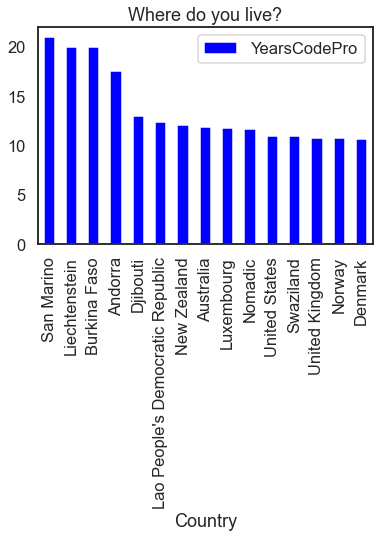

In [290]:
explore_data[['YearsCodePro', 'Country']].dropna().groupby('Country').mean().sort_values(by='YearsCodePro', ascending=False)\
.head(15).plot.bar(color='blue')
plt.title(schema.Country)

In [291]:
# Surprisingly, an individual in the US and UK on average have less coding experience professionally than say San Marino or 
# Australia - this maybe the case because of lack of data points for other countries

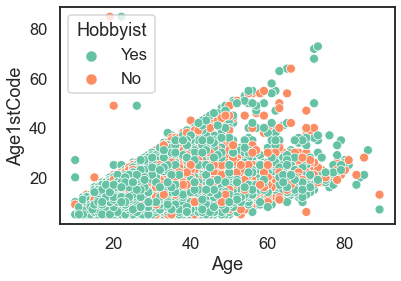

In [292]:
# Question 4 - Age vs Starting Coding
sns.scatterplot(x='Age', y='Age1stCode', hue='Hobbyist', data=explore_data, palette='Set2')
plt.xlabel("Age")
plt.ylabel("Age1stCode");

# We can see some points which do not make much sense - for example age 20 individual learnt coding at 80 - we need to 
# remove these points before performing machine learning

# However, going back to our analysis, we see that many people around the age of 40-60 started coding in their 40s and 60s
# which shows you can start learning coding at anytime

In [293]:
explore_data._get_numeric_data().dropna()

,Age,Age1stCode,YearsCodePro,YearsCode,WorkWeekHrs,ConvertedComp
7,36.0,12.0,13.0,17.0,39.0,116000.0
9,22.0,14.0,4.0,8.0,36.0,32315.0
10,23.0,13.0,2.0,10.0,40.0,40070.0
11,49.0,42.0,7.0,7.0,40.0,14268.0
12,53.0,14.0,20.0,35.0,36.0,38916.0
...,...,...,...,...,...,...
62212,30.0,21.0,5.0,3.0,9.0,38724.0
63083,25.0,12.0,10.0,10.0,60.0,45600.0
63402,32.0,12.0,7.0,19.0,35.0,74500.0
63517,33.0,13.0,12.0,20.0,40.0,59454.0


In [294]:
from scipy import stats

(np.abs(stats.zscore(explore_data._get_numeric_data().dropna())) < 3).sum()

Age              28030
Age1stCode       28033
YearsCodePro     27908
YearsCode        28184
WorkWeekHrs      27068
ConvertedComp    27686
dtype: int64

In [295]:
(explore_data['Age'] < explore_data['Age1stCode']).sum()

# We have 19 of invalid points

19

In [296]:
explore_data[explore_data['Age'] >= explore_data['Age1stCode']].shape

(44900, 39)

In [297]:
# first we remove all points where Age1stCode > Age
exp_data = explore_data[explore_data['Age'] >= explore_data['Age1stCode']]

In [298]:
exp_data.reset_index(drop=True, inplace=True)

In [299]:
exp_data.shape

(44900, 39)

In [300]:
exp_data._get_numeric_data()

,Age,Age1stCode,YearsCodePro,YearsCode,WorkWeekHrs,ConvertedComp
0,25.0,18.0,4.0,7.0,40.0,NaN
1,31.0,16.0,8.0,15.0,NaN,NaN
2,36.0,12.0,13.0,17.0,39.0,116000.0
3,30.0,20.0,4.0,6.0,50.0,NaN
4,22.0,14.0,4.0,8.0,36.0,32315.0
...,...,...,...,...,...,...
44895,22.0,10.0,NaN,10.0,NaN,NaN
44896,34.0,18.0,14.0,16.0,NaN,NaN
44897,38.0,35.0,NaN,3.0,NaN,NaN
44898,64.0,18.0,NaN,30.0,NaN,NaN


In [301]:
# We will not be needing Years Code in our ML models as the column is highly correlated with years code professional 
# which may cause problems (multicollinearity) - hence we will remove that column from our numeric data

# Compensation converted annually may not be a great predictor as well for years in coding professionally and we will remove 
# that column as well since if we do not, we lose 1000s of rows

In [302]:
# We remove all outliers above 3 standard deviations above the mean for the numeric columns
exp_data = exp_data.iloc[list((np.abs(stats.zscore(exp_data._get_numeric_data()[['Age', 'Age1stCode', 'YearsCodePro',
                                                                                'WorkWeekHrs']] \
                                                   .dropna())) < 3).index), :]

In [303]:
exp_data.shape

(33209, 39)

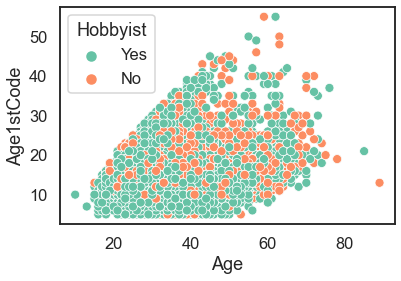

In [304]:
# Question 4 - Age vs Starting Coding
sns.scatterplot(x='Age', y='Age1stCode', hue='Hobbyist', data=exp_data, palette='Set2')
plt.xlabel("Age")
plt.ylabel("Age1stCode");


In [305]:
# We have removed most of the outliers comparing the diagrams

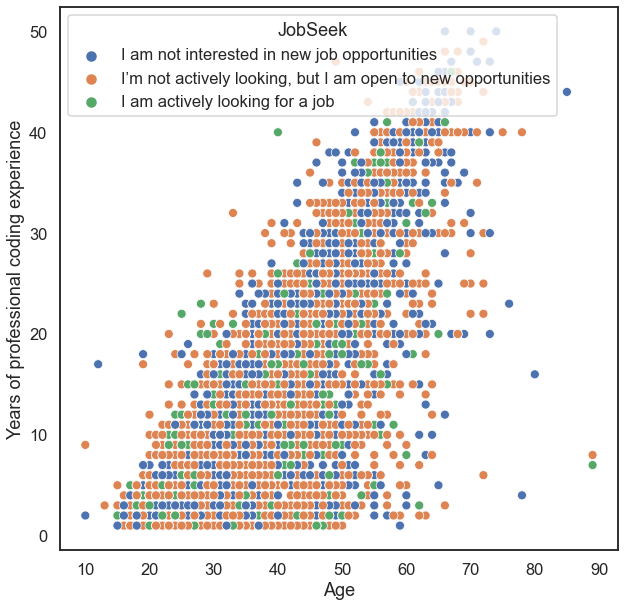

In [306]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age', y='YearsCodePro', hue='JobSeek', data=explore_data)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

In [307]:
# We can see that many individuals having ages between 30-70 have only less than 10 or 5 year professional experience 
# in coding which emphasizes the point of getting a career in coding at any age
# There are points which say they are 90 years old and are looking for job opportunities which is kind of an outlier as well 
# and we need to remove these 

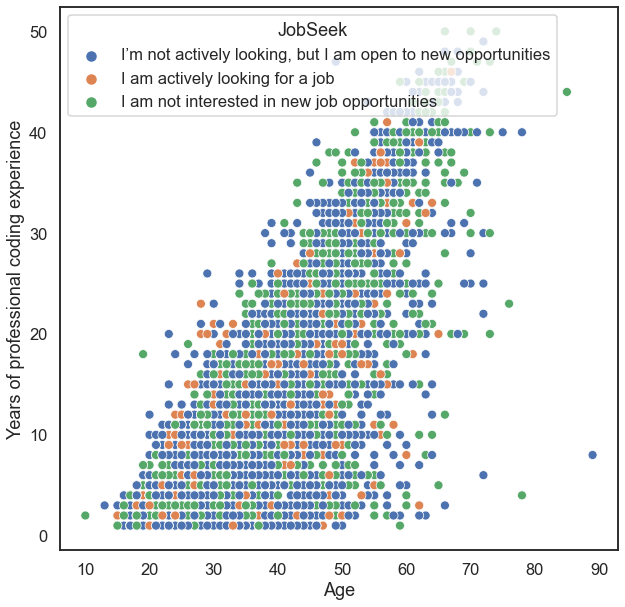

In [308]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age', y='YearsCodePro', hue='JobSeek', data=exp_data)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

# As shown below, the exp data removes all the nonsensical points from our data which allows us to use our data for ML in the 
# next stage

In [309]:
# Let us try a word cloud for the column mis tech desired for next year to see what sort of tools do the respondents
# want to work with 

from wordcloud import WordCloud

In [310]:
# Remove any duplicate columns if present 
exp_data = exp_data.loc[:,~exp_data.columns.duplicated()]

In [311]:
words = ''

for val in exp_data['MiscTechDesireNextYear'].dropna():
    val = str(val)
    
    tokens = val.split(';')
    
    words += " ".join(tokens)+" "

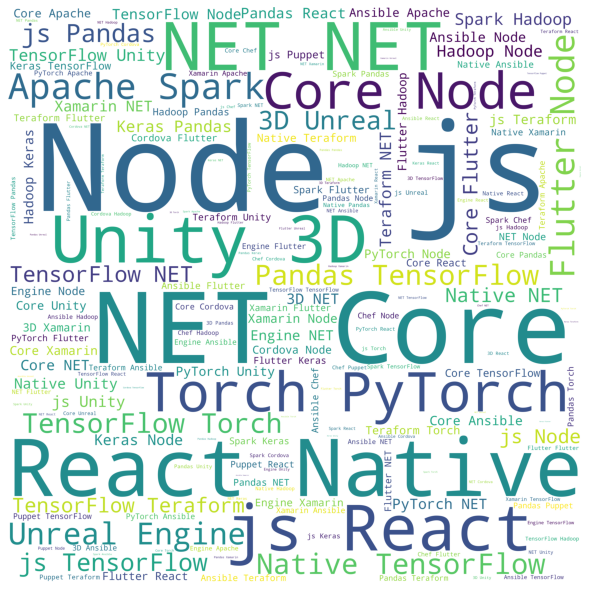

In [312]:
wordcloud = WordCloud(width = 4000, height = 4000, 
                background_color ='white',  
                min_font_size = 10).generate(words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [313]:
# Node js, React, PyTorch, NET, NET Core, TesnsorFLow, Unreal Engine are some of the most common technologies

### Section 2 - Machine Learning

### Feature selection/engineering

In [314]:
exp_data.shape

(33209, 39)

In [315]:
# We have done all the exploratory analysis, if we drop all the null values, we remain with only around 9000 rows and hence
# we need to select our features or perform feature engineering in order to retain as much of the information and data 
# as possible as the more the data, the better will be our ML model

In [316]:
exp_data.columns

Index(['Age', 'Country', 'EdLevel', 'Ethnicity', 'Gender', 'Sexuality',
       'Trans', 'UndergradMajor', 'Hobbyist', 'MainBranch', 'Age1stCode',
       'LanguageWorkedWith', 'DatabaseWorkedWith', 'MiscTechDesireNextYear',
       'MiscTechWorkedWith', 'PlatformWorkedWith', 'PlatformDesireNextYear',
       'YearsCodePro', 'YearsCode', 'LanguageDesireNextYear',
       'DatabaseDesireNextYear', 'SOPartFreq', 'SurveyEase', 'SurveyLength',
       'SOComm', 'SOAccount', 'NEWEdImpt', 'NEWJobHuntResearch', 'NEWLearn',
       'NEWOtherComms', 'JobFactors', 'OrgSize', 'NEWOvertime', 'JobSat',
       'JobSeek', 'WorkWeekHrs', 'ConvertedComp', 'Employment', 'DevType'],
      dtype='object')

In [317]:
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33209 entries, 0 to 44821
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     33209 non-null  float64
 1   Country                 33209 non-null  object 
 2   EdLevel                 32681 non-null  object 
 3   Ethnicity               30567 non-null  object 
 4   Gender                  32832 non-null  object 
 5   Sexuality               29809 non-null  object 
 6   Trans                   32341 non-null  object 
 7   UndergradMajor          30842 non-null  object 
 8   Hobbyist                33209 non-null  object 
 9   MainBranch              33209 non-null  object 
 10  Age1stCode              33209 non-null  float64
 11  LanguageWorkedWith      33033 non-null  object 
 12  DatabaseWorkedWith      29457 non-null  object 
 13  MiscTechDesireNextYear  25514 non-null  object 
 14  MiscTechWorkedWith      24388 non-null

In [318]:
# All columns which have less than 30,000 rows, we will remove since we want more and more data
# Sexuality, Database worked with, Misc Tech Worked with and Desired Next Year, Databases desired, Stackoverflow frequency, 
# Converted Compensation

exp_data.drop(columns=['Sexuality', 'DatabaseWorkedWith', 'MiscTechDesireNextYear',
       'MiscTechWorkedWith', 'DatabaseDesireNextYear', 'SOPartFreq', 'ConvertedComp'], inplace=True)

In [319]:
ML_data = exp_data.copy()

<AxesSubplot:>

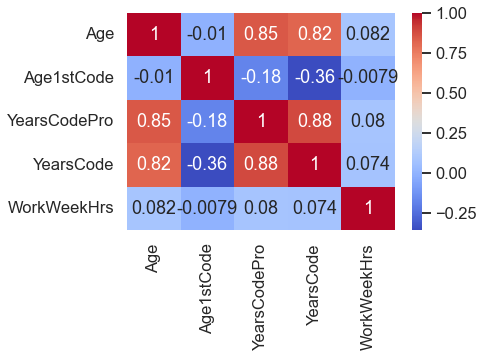

In [322]:
sns.heatmap(ML_data.corr(), cmap='coolwarm', annot=True)

In [323]:
# Let us remove Age and and Year coding as multicollinearity may weaken our models (linear models especially)

In [324]:
ML_data.drop(columns=['Age', 'YearsCode'], inplace=True)

In [331]:
ML_data.shape

(33209, 30)

In [332]:
ML_data['OrgSize'].unique()

array(['20 to 99 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '2 to 9 employees', '10,000 or more employees',
       '100 to 499 employees', '10 to 19 employees',
       '500 to 999 employees', '1,000 to 4,999 employees', nan,
       '5,000 to 9,999 employees'], dtype=object)

In [330]:
ML_data['MainBranch'].value_counts()

I am a developer by profession                                                   30207
I am not primarily a developer, but I write code sometimes as part of my work     3002
Name: MainBranch, dtype: int64

In [353]:
ML_data['DevType'].nunique()

6082

In [340]:
ML_data.dropna().shape

(21076, 30)

In [341]:
ML_data.columns

Index(['Country', 'EdLevel', 'Ethnicity', 'Gender', 'Trans', 'UndergradMajor',
       'Hobbyist', 'MainBranch', 'Age1stCode', 'LanguageWorkedWith',
       'PlatformWorkedWith', 'PlatformDesireNextYear', 'YearsCodePro',
       'LanguageDesireNextYear', 'SurveyEase', 'SurveyLength', 'SOComm',
       'SOAccount', 'NEWEdImpt', 'NEWJobHuntResearch', 'NEWLearn',
       'NEWOtherComms', 'JobFactors', 'OrgSize', 'NEWOvertime', 'JobSat',
       'JobSeek', 'WorkWeekHrs', 'Employment', 'DevType'],
      dtype='object')

In [350]:
# We still need to remove some columns first
# We need to remove either worked with platforms or languages or desired with as they will be sometimes the same
# and not add much information

ML_data.drop(columns=['PlatformDesireNextYear', 'LanguageDesireNextYear'], inplace=True)

In [351]:
# With platforms and languages worked with, let us select very technical languages that can help the model indicate the 
# the number of years of professional coding experience (older languages maybe a hint)

# We select C, Ruby, Docker, Rasberry Pi, Andriod, Arduino, WordPress, Google Cloud Platform

In [369]:
'AWS' in 'AWS; Heroku; iOS'

True

In [422]:
A = []
W = []
GCP = []
RP = []
D = []
And = []

def func_M(df, column, val, chosen_list):
    for i in df[column]:
        if val in str(i):
            chosen_list.append('Yes')
        else:
            chosen_list.append('No')
    A = chosen_list
    return A

In [423]:
Android = []
And = func_M(ML_data, column='PlatformWorkedWith', val='Android', chosen_list=Android)

In [424]:
WordPress = []
W = func_M(ML_data, column='PlatformWorkedWith', val='WordPress', chosen_list=WordPress)

In [425]:
Docker = []
D = func_M(ML_data, column='PlatformWorkedWith', val='Docker', chosen_list=Docker)

In [429]:
len(D)

33209

In [426]:
ML_data2 = ML_data.copy()

In [430]:
ML_data2.shape

(33209, 28)

In [431]:
# We will keep W, D and And

ML_data2['Android'] = And
ML_data2['WordPress'] = W
ML_data2['Docker'] = D

In [432]:
C = []
C_lang = func_M(ML_data, column='LanguageWorkedWith', val='C', chosen_list=C)

In [433]:
Ruby = []
R = func_M(ML_data, column='LanguageWorkedWith', val='Ruby', chosen_list=Ruby)

In [434]:
ML_data2['Ruby'] = R
ML_data2['C'] = C_lang

In [454]:
# Moving onto ethnicity, lets keep white, south asian, hispanic, middle eastern, east asia, black 

White = []
South = []
Hispanic = []
Middle_east = []
East = []
Black = []


White = func_M(ML_data, column='Ethnicity', val='White', chosen_list=White)

South = func_M(ML_data, column='Ethnicity', val='South Asian', chosen_list=South)

East = func_M(ML_data, column='Ethnicity', val='East Asian', chosen_list=East)

Hispanic = func_M(ML_data, column='Ethnicity', val='Hispanic or Latino/a/x ', chosen_list=Hispanic)

Middle_east = func_M(ML_data, column='Ethnicity', val='Middle Eastern', chosen_list=Middle_east)

Black = func_M(ML_data, column='Ethnicity', val='Black', chosen_list=Black)

In [464]:
ML_data2['White'] = White
ML_data2['South_Asian'] = South
ML_data2['East_Asian'] = East
ML_data2['Middle_east'] = Middle_east
ML_data2['Black'] = Black

In [465]:
pd.DataFrame(South).value_counts()

No     30619
Yes     2590
dtype: int64

In [472]:
# Country, we can keep the top 6 and label the rest as others

ML_data2.Country.value_counts().head(6)

United States     7488
India             2795
United Kingdom    2407
Germany           2270
Canada            1225
France            1090
Name: Country, dtype: int64

In [473]:
ML_data3 = ML_data2.copy()

In [479]:
'Poland' not in ['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France']

True

In [492]:
 ML_data3.iloc[5, 0]

'Spain'

In [493]:
for i, val in enumerate(ML_data3.Country):
    if str(val) not in ['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France']:
        ML_data3.iloc[i, 0] = 'Other'
    else:
        pass

In [494]:
ML_data3.Country.value_counts().head(10)

Other             15934
United States      7488
India              2795
United Kingdom     2407
Germany            2270
Canada             1225
France             1090
Name: Country, dtype: int64

In [500]:
# The rest of the categorical columns with unique values above 20, we will remove all

In [503]:
ML_data3.select_dtypes(include='object').columns

Index(['Country', 'EdLevel', 'Ethnicity', 'Gender', 'Trans', 'UndergradMajor',
       'Hobbyist', 'MainBranch', 'LanguageWorkedWith', 'PlatformWorkedWith',
       'SurveyEase', 'SurveyLength', 'SOComm', 'SOAccount', 'NEWEdImpt',
       'NEWJobHuntResearch', 'NEWLearn', 'NEWOtherComms', 'JobFactors',
       'OrgSize', 'NEWOvertime', 'JobSat', 'JobSeek', 'Employment', 'DevType',
       'Android', 'WordPress', 'Docker', 'Ruby', 'C', 'White', 'South_Asian',
       'East_Asian', 'Middle_east', 'Black'],
      dtype='object')

In [510]:
l = []
for i in ML_data3.select_dtypes(include='object').columns:
    if ML_data3[i].nunique() >= 20:
        l.append(i)

In [511]:
l

['Ethnicity',
 'LanguageWorkedWith',
 'PlatformWorkedWith',
 'NEWJobHuntResearch',
 'JobFactors',
 'DevType']

In [513]:
# We will all these above columns now and then perform pd.get dummies

ML_data3.drop(columns=['Ethnicity',
 'LanguageWorkedWith',
 'PlatformWorkedWith',
 'NEWJobHuntResearch',
 'JobFactors',
 'DevType'], inplace=True)

### Get Dummies 

In [514]:
ML_df = pd.get_dummies(ML_data3, drop_first=True)

In [519]:
ML_df.dropna(inplace=True)

In [520]:
ML_df.shape

(33209, 82)

In [521]:
# Just like we desired, we retain 33,000 rows and have good features to work with

In [551]:
ML_df.to_csv('Final_data')

In [4]:
ML_df = pd.read_csv('Final_data')

In [5]:
ML_df[['YearsCodePro']].min()

YearsCodePro    1.0
dtype: float64

In [6]:
# Instead of looking at the problem as a regression, we will go with a classification problem as there is more gained 
# with this approach where with a regression your model can try to predict the exact number but will likely to be off
# instead we can split the column into categories where 0-3 is junior, 4-12 years for Mid-Senior,
# 15-50 is expert or managerial level

In [7]:
ML_df['Pro_coding_experience'] = np.where(ML_df['YearsCodePro'] < 4, 'Junior', 
                                                  np.where(ML_df['YearsCodePro'] < 12, 'Mid-Senior', 'Managerial'))

<AxesSubplot:xlabel='Pro_coding_experience', ylabel='count'>

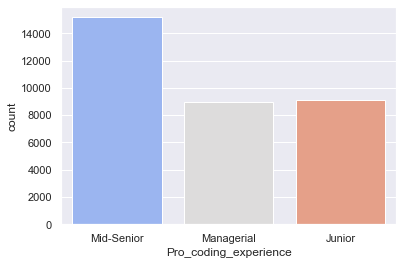

In [8]:
sns.countplot(x='Pro_coding_experience', data=ML_df, palette='coolwarm')

In [9]:
# We have fairly balanced classes, but we will use oversampling, in particular - SMOTE-Tomek to generate further balanced
# classes

### Train-Test Split

In [10]:
df = ML_df.copy()

In [11]:
from sklearn.model_selection import train_test_split
df.drop(columns=['YearsCodePro'], inplace=True)
X = df.drop('Pro_coding_experience', axis=1)
y = df['Pro_coding_experience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
df['Pro_coding_experience'].value_counts(normalize=True) # Almost the same 

Mid-Senior    0.456985
Junior        0.273932
Managerial    0.269084
Name: Pro_coding_experience, dtype: float64

In [13]:
X_train.shape

(23246, 82)

### Oversampling

In [14]:
from imblearn.combine import SMOTETomek

In [15]:
oversampling = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = oversampling.fit_resample(X_test, y_test)

X_train_smote.shape

(27343, 82)

<AxesSubplot:xlabel='Pro_coding_experience', ylabel='count'>

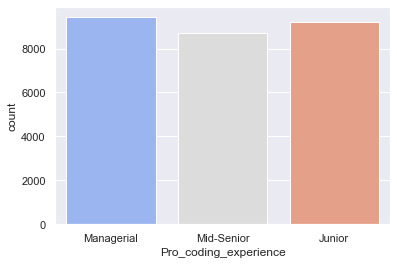

In [16]:
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.countplot(x=y_train_smote , palette='coolwarm')

### Dimensionality Reduction

#### PCA

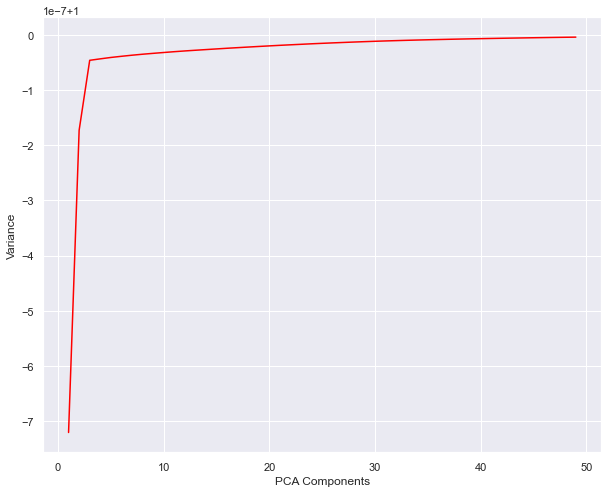

In [17]:
# log columns
from sklearn.decomposition import PCA

pca_list = list()

# Fit a range of PCA models

for n in range(1, 50):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X_train_smote)# has 86 features
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')


plt.figure(figsize=(10,8))
sns.lineplot(x='n', y='var', data=pca_df, color='red')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.show()

In [18]:
# We see that a lot of variance is explained with only 5-10 features - we will go reduce our features to 20
# in order to keep as many features as possible along with making sure to avoid too many dimensions and find problems 
# such as the curse of dimensionality (more rows being needed to get to a certain accuracy)

In [19]:
PCAmod = PCA(n_components=20)
PCAmod.fit(X_train_smote)
X_train_smote_pca = pd.DataFrame(PCAmod.transform(X_train_smote))
# transform new data using already fitted pca
X_test_smote_pca = pd.DataFrame(PCAmod.transform(X_test_smote))

### Best Classification ML Models

In [20]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from xgboost import XGBClassifier

# metrics and pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

In [65]:
# First just use a gradient boosting classifier on training and test sets that are not oversampled and no PCA
# This result should get better as we used the oversampled and data with PCA transformation
rf = GradientBoostingClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      Junior       0.54      0.29      0.37      2707
  Managerial       0.56      0.35      0.43      2769
  Mid-Senior       0.49      0.75      0.59      4487

    accuracy                           0.51      9963
   macro avg       0.53      0.46      0.47      9963
weighted avg       0.52      0.51      0.49      9963

[[ 773  153 1781]
 [ 130  963 1676]
 [ 518  618 3351]]


In [32]:
### Select best performing model

model_dict = {
    
    'Logistic regression': LogisticRegression(random_state=0),
    'Naive Bayes': GaussianNB(), 
    'Random Forest Classifier': RandomForestClassifier(random_state=0),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=0),
    'Support Vector Machine': SVC(random_state=0),
    'Decison Tree': DecisionTreeClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0)
    
}

In [28]:
model_list = []
test_acc_list = []
counter_list = []
metric_scores_list = []


for label, model in model_dict.items():
    model.fit(X_train_smote_pca, y_train_smote)
    predictions = model.predict(X_test_smote_pca)
    acc = accuracy_score(y_test_smote, predictions)
    report = precision_recall_fscore_support(y_test_smote, predictions,  average='macro')
    report_values = ("precision = %0.2f, recall = %0.2f, F1 = %0.2f" % (report [0], report[1], report[2]))

    print(model, 'Model')
    print(classification_report(y_test_smote, predictions))
    print(confusion_matrix(y_test_smote, predictions))
    print('----------------------------------------')
    
    model_list.append(label)
    test_acc_list.append(acc)
    metric_scores_list.append(report_values)
    
    
results = pd.DataFrame({'model': model_list, 'test_acc': test_acc_list, 'metric': metric_scores_list})

LogisticRegression(random_state=0) Model
              precision    recall  f1-score   support

      Junior       0.59      0.39      0.47      3695
  Managerial       0.49      0.64      0.55      3676
  Mid-Senior       0.45      0.47      0.46      3448

    accuracy                           0.50     10819
   macro avg       0.51      0.50      0.50     10819
weighted avg       0.51      0.50      0.50     10819

[[1459 1035 1201]
 [ 602 2344  730]
 [ 401 1441 1606]]
----------------------------------------
GaussianNB() Model
              precision    recall  f1-score   support

      Junior       0.53      0.58      0.55      3695
  Managerial       0.47      0.68      0.56      3676
  Mid-Senior       0.50      0.23      0.31      3448

    accuracy                           0.50     10819
   macro avg       0.50      0.49      0.47     10819
weighted avg       0.50      0.50      0.48     10819

[[2130 1156  409]
 [ 812 2482  382]
 [1062 1597  789]]
---------------------------

In [34]:
# The best models we get are XGBoost, Random Forest and Gradient Boosting Classifier
# We can use these as an esemble method later and perform grid search 

In [35]:
pd.reset_option('max_colwidth')
display(results)

,model,test_acc,metric
0,Logistic regression,0.499954,"precision = 0.51, recall = 0.50, F1 = 0.50"
1,Naive Bayes,0.499214,"precision = 0.50, recall = 0.49, F1 = 0.47"
2,Random Forest Classifier,0.544505,"precision = 0.55, recall = 0.55, F1 = 0.54"
3,Gradient Boosting Classifier,0.544967,"precision = 0.56, recall = 0.55, F1 = 0.54"
4,Support Vector Machine,0.368796,"precision = 0.36, recall = 0.36, F1 = 0.34"
5,Decison Tree,0.452907,"precision = 0.45, recall = 0.45, F1 = 0.45"
6,XGBoost,0.546169,"precision = 0.55, recall = 0.55, F1 = 0.55"


### Grid Search

In [38]:
# Random Forest
param_grid = {
    'bootstrap': [True],
    'max_features': [1, 3, 9],
    'min_samples_leaf': [2,3, 5],
    'min_samples_split': [2,3,5, 7],
    'n_estimators': [200]
}

model_rf = RandomForestClassifier(n_jobs=-1)
rf_clf = GridSearchCV(model_rf, param_grid=param_grid, verbose=1, cv=3)

In [39]:
rf_clf.fit(X_train_smote_pca, y_train_smote)
print(classification_report(y_test_smote, rf_clf.predict(X_test_smote_pca)))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
              precision    recall  f1-score   support

      Junior       0.61      0.48      0.53      3695
  Managerial       0.58      0.52      0.55      3676
  Mid-Senior       0.48      0.65      0.55      3448

    accuracy                           0.55     10819
   macro avg       0.56      0.55      0.54     10819
weighted avg       0.56      0.55      0.54     10819



In [45]:
rf_clf.best_params_

{'bootstrap': True,
 'max_features': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 200}

In [53]:
# Gradient Boosting
parameters = {
    "subsample":[0.8,0.6, 0.3], 
    "max_depth": [3,5],
    "min_samples_leaf": [2, 3, 5]    }

from sklearn.metrics import f1_score

In [54]:
model_gb = GradientBoostingClassifier()
gb_clf = GridSearchCV(model_gb, param_grid=parameters, verbose=2, cv=2, scoring=f1_score)
gb_clf.fit(X_train_smote_pca, y_train_smote)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.8; total time=  17.1s
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.8; total time=  17.3s
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.6; total time=  12.7s
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.6; total time=  13.0s
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.3; total time=   6.7s
[CV] END .....max_depth=3, min_samples_leaf=2, subsample=0.3; total time=   6.7s
[CV] END .....max_depth=3, min_samples_leaf=3, subsample=0.8; total time=  16.9s
[CV] END .....max_depth=3, min_samples_leaf=3, subsample=0.8; total time=  17.1s
[CV] END .....max_depth=3, min_samples_leaf=3, subsample=0.6; total time=  12.7s
[CV] END .....max_depth=3, min_samples_leaf=3, subsample=0.6; total time=  12.9s
[CV] END .....max_depth=3, min_samples_leaf=3, subsample=0.3; total time=   6.7s
[CV] END .....max_depth=3, min_samples_leaf=3, s

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [2, 3, 5],
                         'subsample': [0.8, 0.6, 0.3]},
             scoring=<function f1_score at 0x000001A8D7922F70>, verbose=2)

In [55]:
gb_clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'subsample': 0.8}

In [56]:
print(classification_report(y_test_smote, gb_clf.predict(X_test_smote_pca)))

              precision    recall  f1-score   support

      Junior       0.61      0.51      0.55      3695
  Managerial       0.59      0.50      0.54      3676
  Mid-Senior       0.48      0.64      0.55      3448

    accuracy                           0.55     10819
   macro avg       0.56      0.55      0.55     10819
weighted avg       0.56      0.55      0.55     10819



In [60]:
# Ensemble learning

from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(max_features=9, min_samples_leaf=2, min_samples_split=7, n_estimators=200)
clf2 = GradientBoostingClassifier(max_depth=3, min_samples_leaf=2, subsample=0.8)
clf3 = XGBClassifier(random_state=0)

eclf1 = VotingClassifier(estimators=[
       ('rf', clf1), ('gb', clf2), ('xg', clf3)], voting='soft', weights=(0.4, 0.8, 0.6))
eclf1 = eclf1.fit(X_train_smote_pca, y_train_smote)
y_pred = eclf1.predict(X_test_smote_pca)


print(classification_report(y_test_smote, y_pred))
print(confusion_matrix(y_test_smote, y_pred))

[21:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      Junior       0.61      0.50      0.55      3695
  Managerial       0.60      0.51      0.55      3676
  Mid-Senior       0.48      0.64      0.55      3448

    accuracy                           0.55     10819
   macro avg       0.56      0.55      0.55     10819
weighted avg       0.56      0.55      0.55     10819

[[1855  564 1276]
 [ 660 1885 1131]
 [ 520  709 2219]]


In [61]:
import pickle

pickle.dump(gb_clf, open('Gradient_Boosting.p', 'wb'))
pickle.dump(rf_clf, open('Random Forest Model.p', 'wb'))

### Conclusions

After PCA and oversampling, the results become better for the Junior and Managerial classes but worse for the Mid-Senior coding experience. In addition, Grid Search did not help much in enhancing our results and perhaps it will not be worth using further hyperparameters. We should probably work on feature engineering and selection further or perhaps adjust the problem to a binary classification problem. 